In [4]:
import cv2, matplotlib.pyplot as plt
from os.path import exists

In [6]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv("transactions_train.csv")
df = df[df['t_dat']>='2020-07-01']
print('Transactions shape',df.shape)
display( df.head() )

df = df[['customer_id','article_id']]

Transactions shape (3386963, 5)


t_dat                                        customer_id  \
28401361  2020-07-01  0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...   
28401362  2020-07-01  0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...   
28401363  2020-07-01  0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...   
28401364  2020-07-01  0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...   
28401365  2020-07-01  0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...   

          article_id     price  sales_channel_id  
28401361   825577003  0.013542                 2  
28401362   849487005  0.042356                 2  
28401363   772659001  0.023712                 2  
28401364   804732004  0.042356                 2  
28401365   804732004  0.042356                 2

In [9]:
# FIND ITEMS PURCHASED TOGETHER BY CUSTOMER
vc = df.article_id.value_counts()
pairs = {}
for j,i in enumerate(vc.index.values[1000:1032]):
    USERS = df.loc[df.article_id==i.item(),'customer_id'].unique()
    vc2 = df.loc[(df.customer_id.isin(USERS))&(df.article_id!=i.item()),'article_id'].value_counts()
    pairs[i.item()] = [vc2.index[0], vc2.index[1], vc2.index[2]]

In [10]:
pairs

{828067001: [828067003, 828067002, 910132001],
 881691002: [874114002, 881691001, 881691003],
 854830001: [854826001, 854830002, 854826002],
 872278001: [759871025, 918547001, 733749001],
 883033001: [883033002, 817353008, 861558003],
 833499005: [779725006, 833530005, 833499003],
 854193004: [863477006, 854193002, 854193003],
 695632002: [850917001, 695632001, 751471001],
 699080001: [351484002, 699081001, 806225002],
 792469001: [719655001, 372860001, 464297007],
 809238005: [809238001, 714790020, 915529003],
 817361006: [817361007, 817361008, 863001001],
 882759003: [882757003, 882759001, 882757001],
 687704022: [743616009, 687704039, 882900007],
 911870003: [911870004, 911870001, 911870002],
 883936001: [832481001, 832481005, 906635001],
 736923011: [736923003, 736923010, 736923009],
 700701002: [700701003, 700701001, 736923003],
 854826001: [854830001, 854830002, 854826002],
 865943002: [865943001, 897693003, 897693001],
 554598070: [554598047, 554598001, 554598077],
 573085042: [

In [11]:
items = article = pd.read_csv("articles.csv")

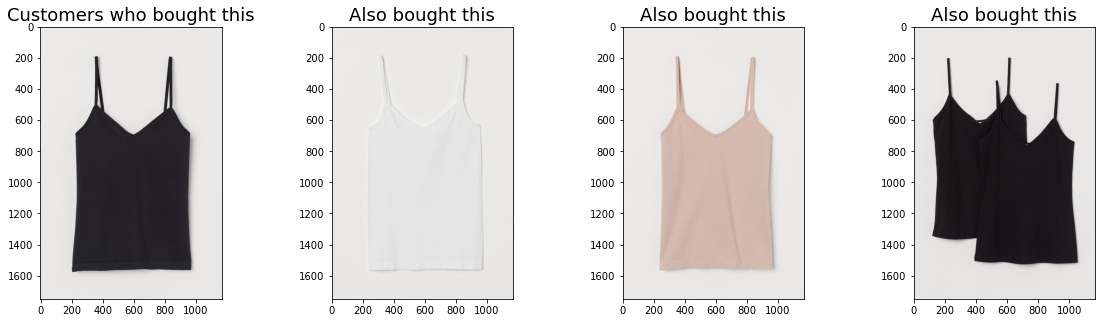

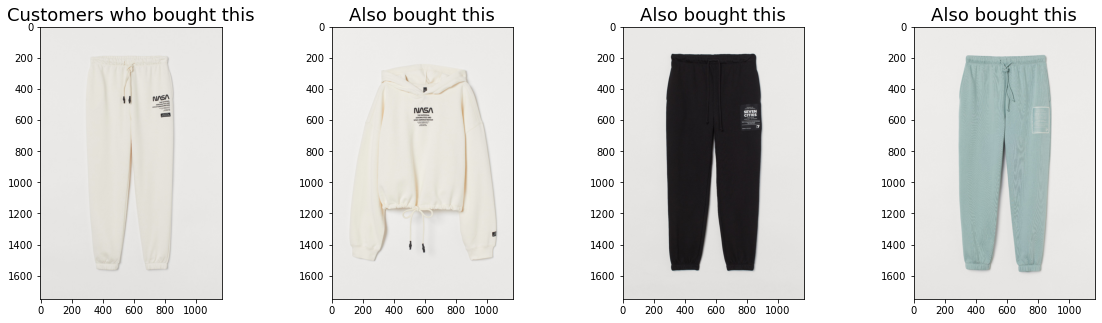

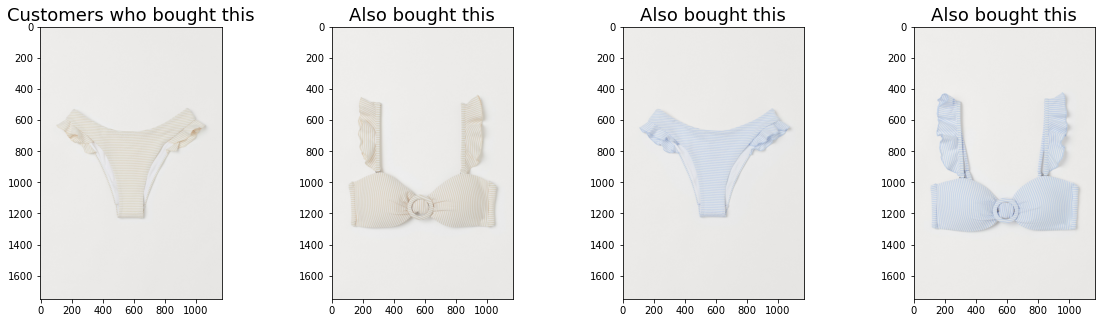

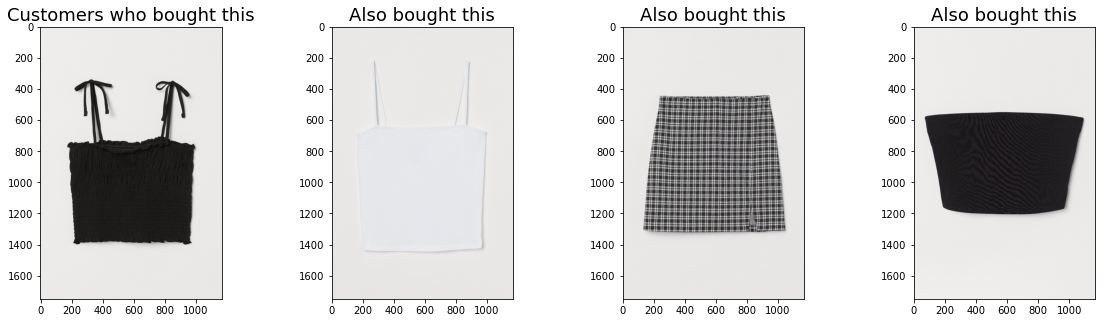

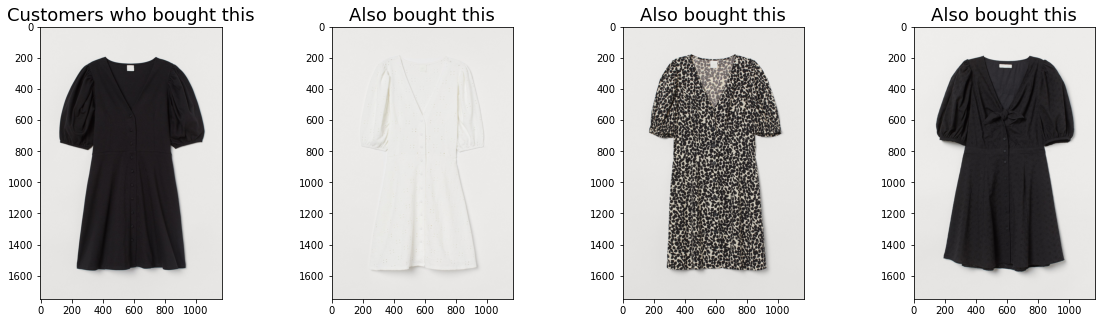

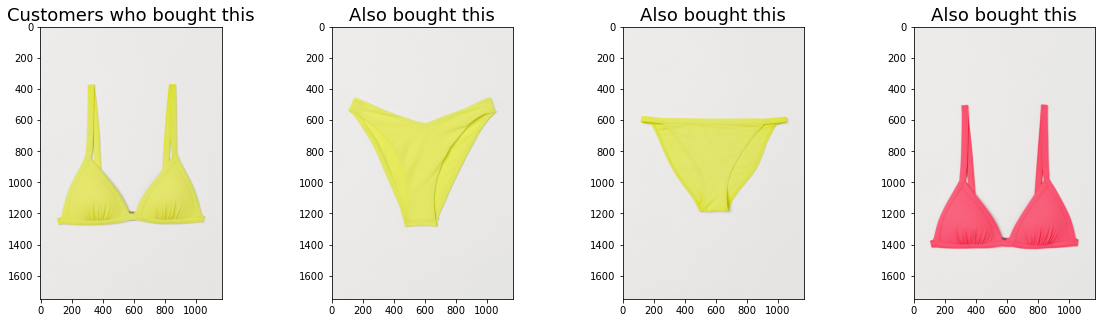

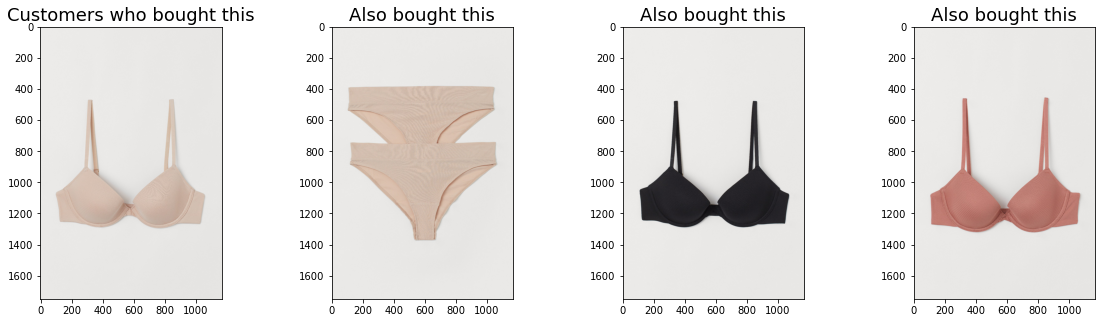

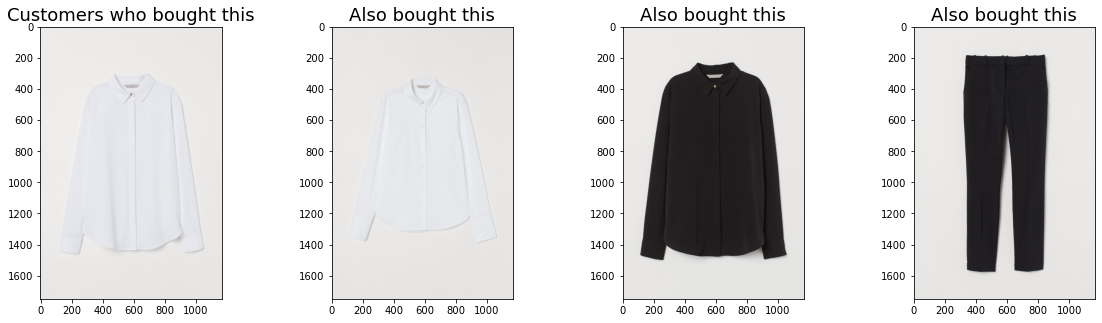

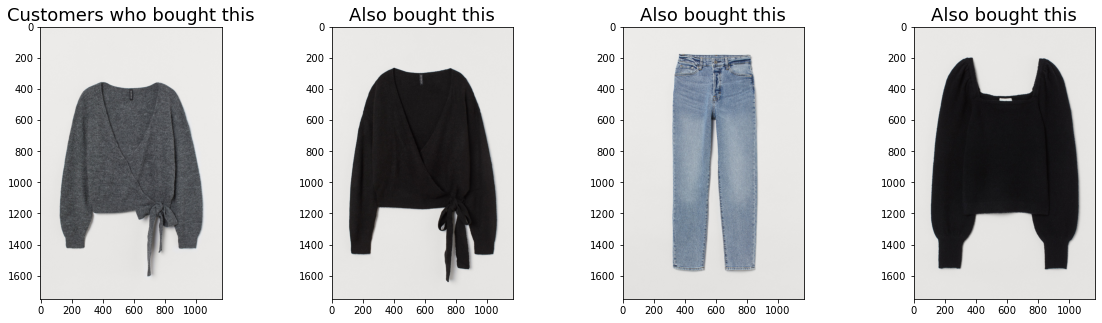

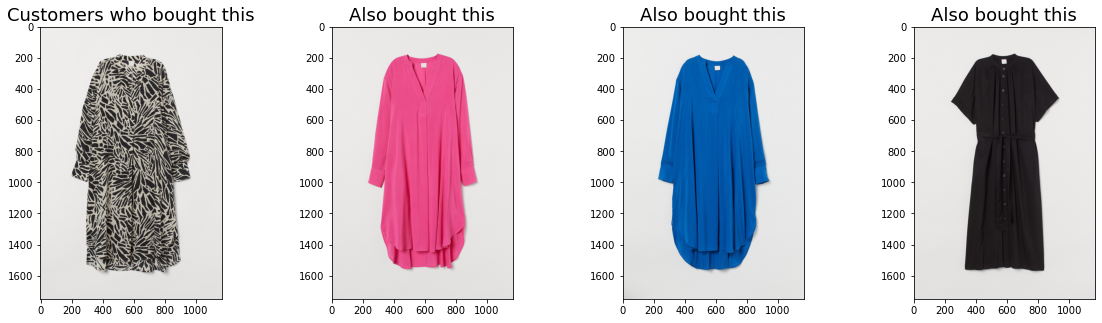

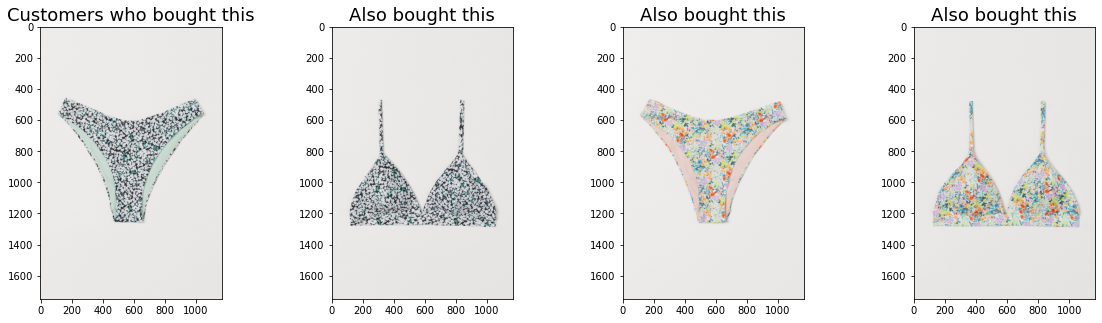

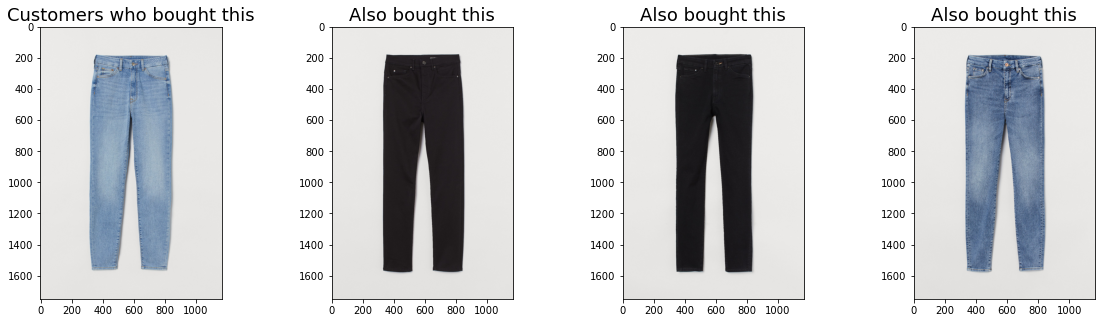

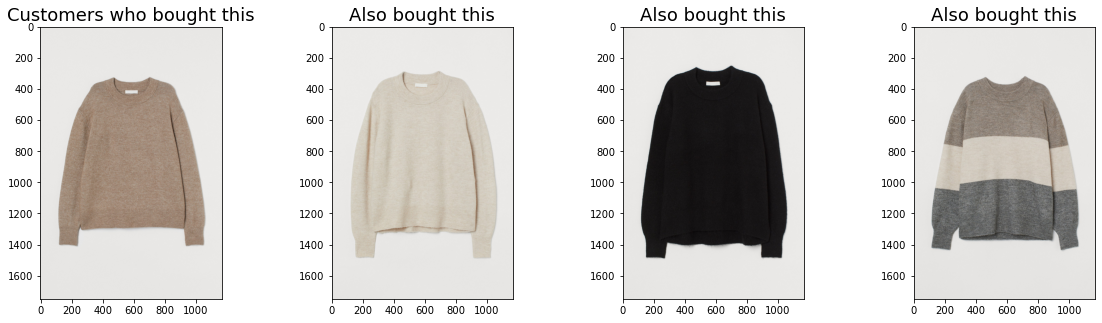

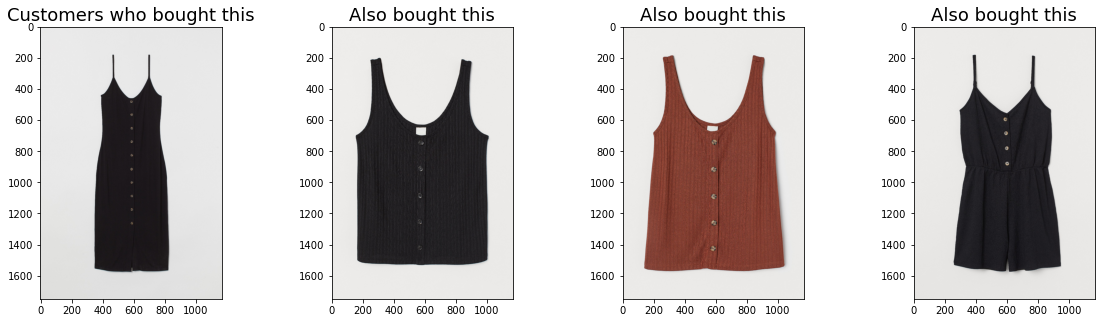

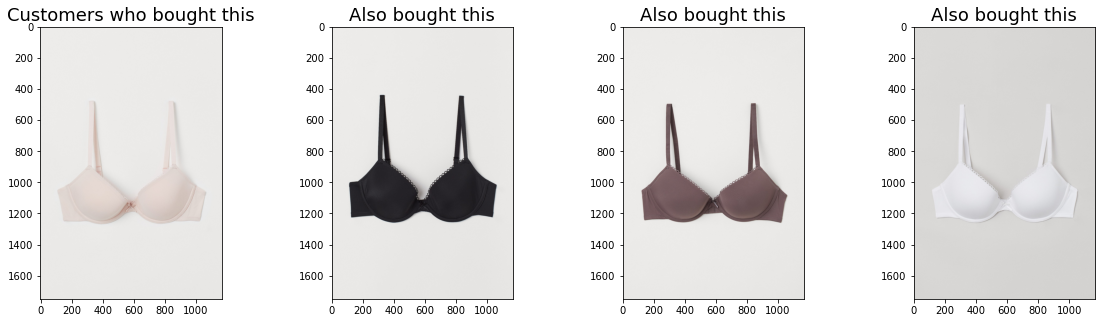

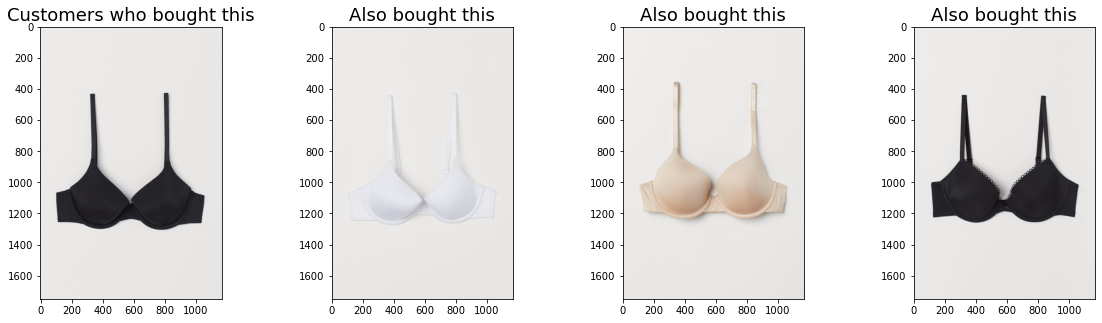

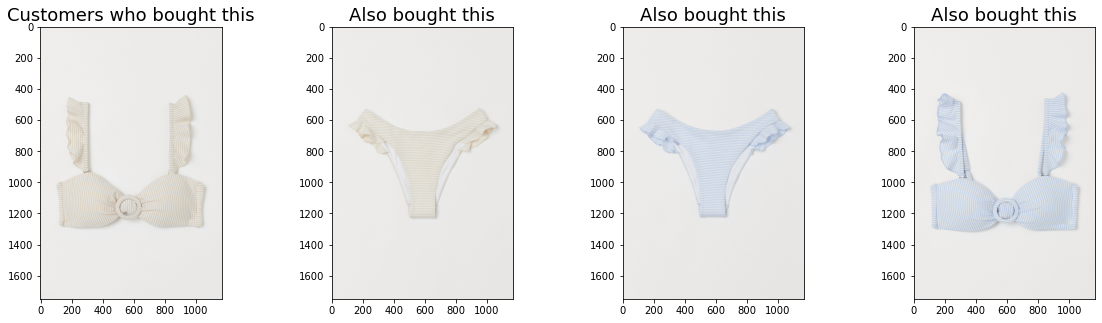

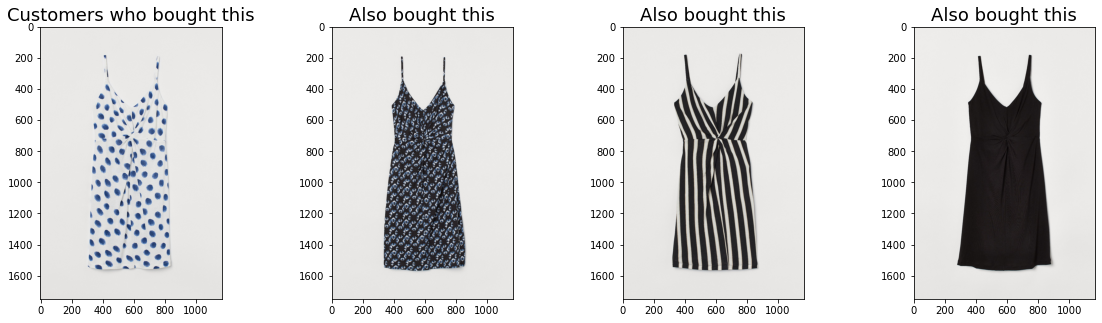

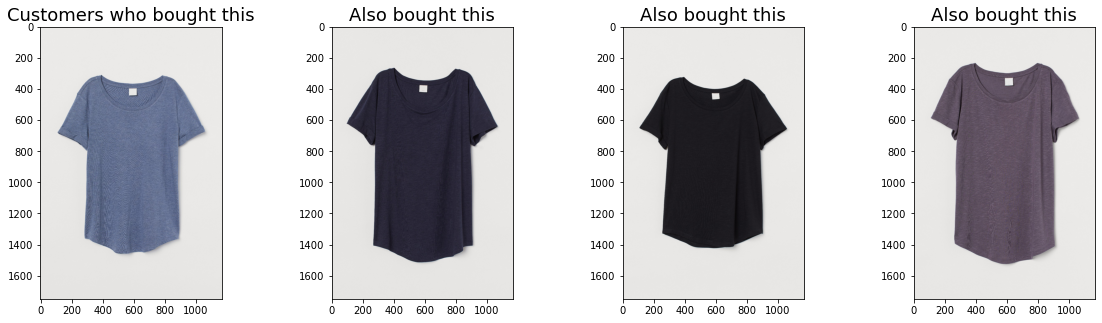

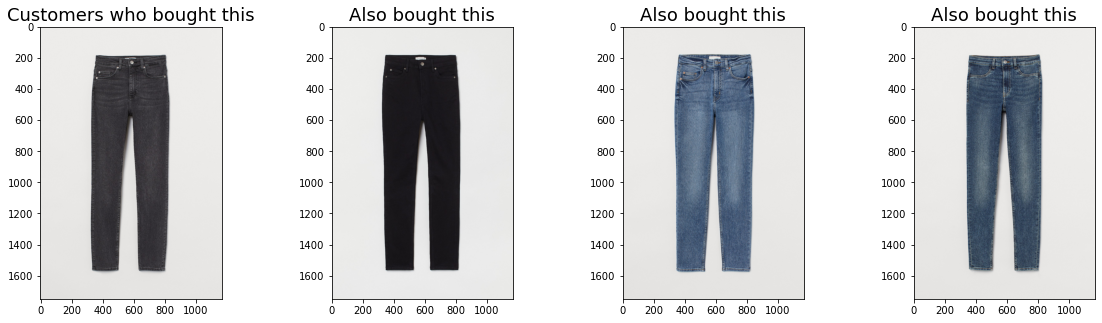

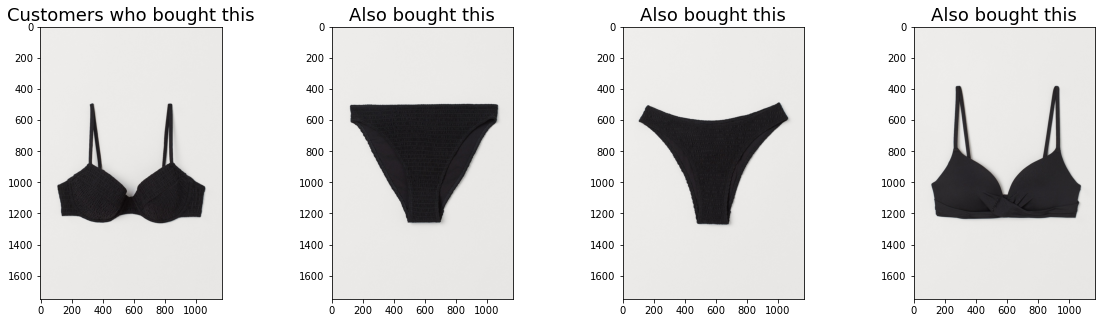

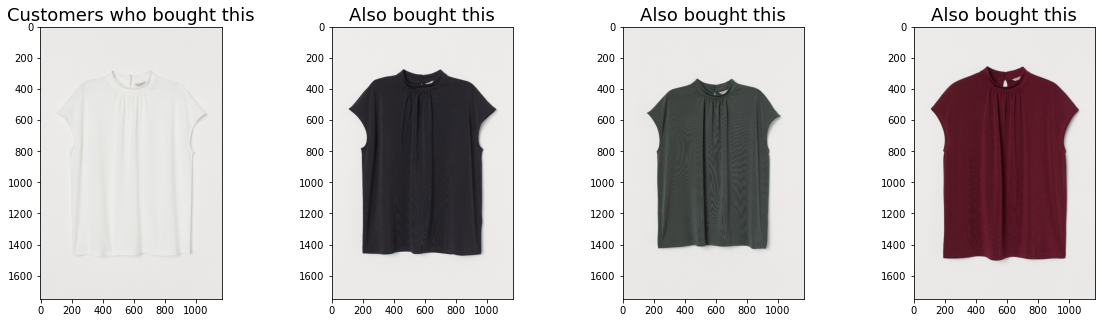

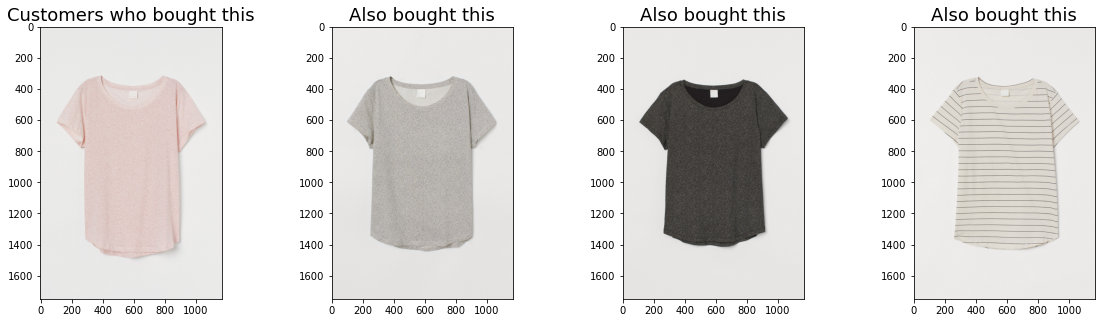

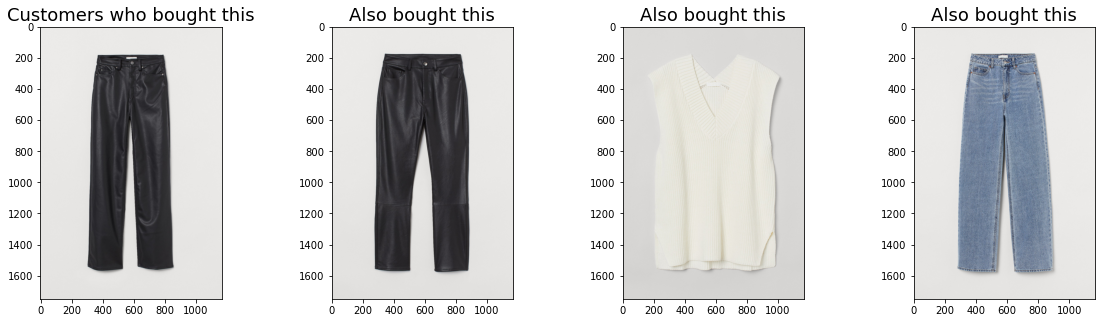

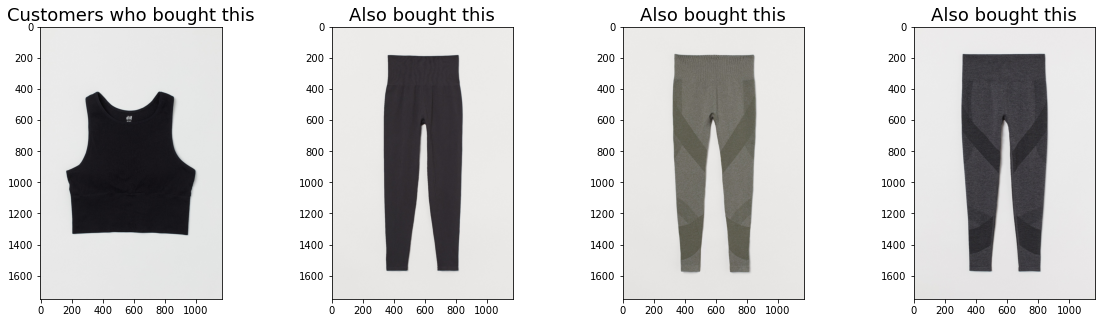

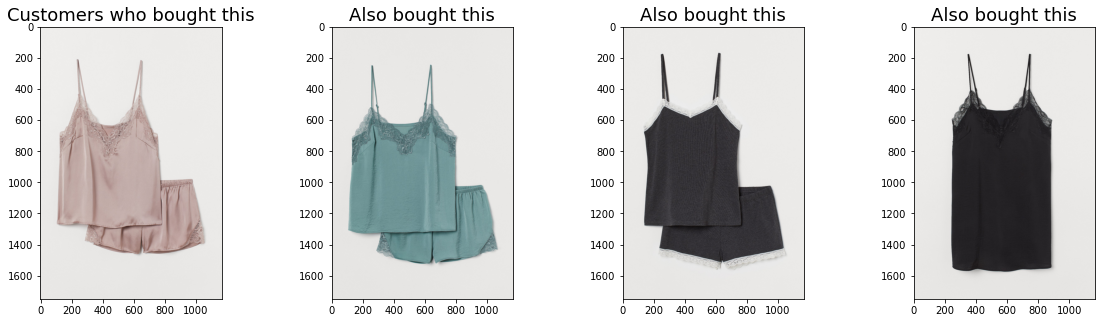

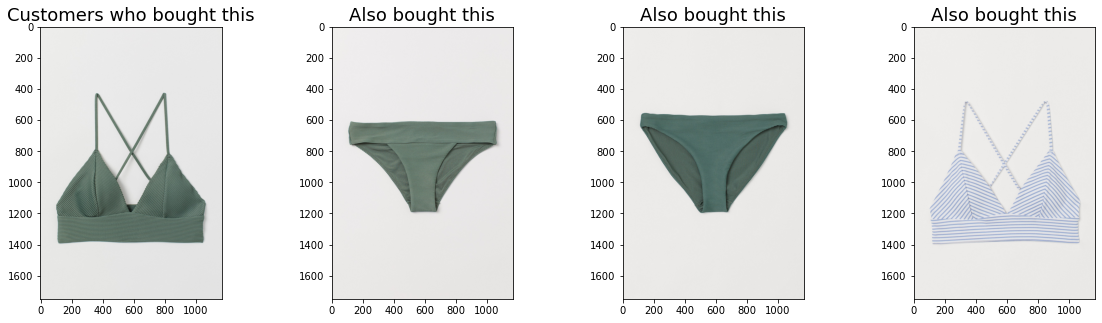

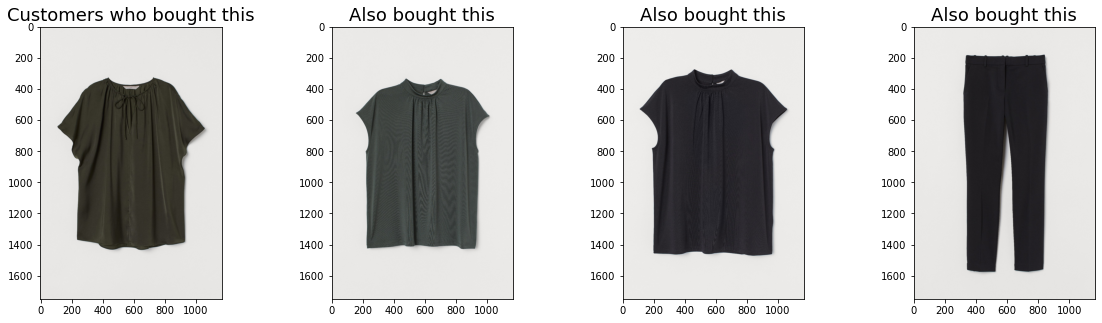

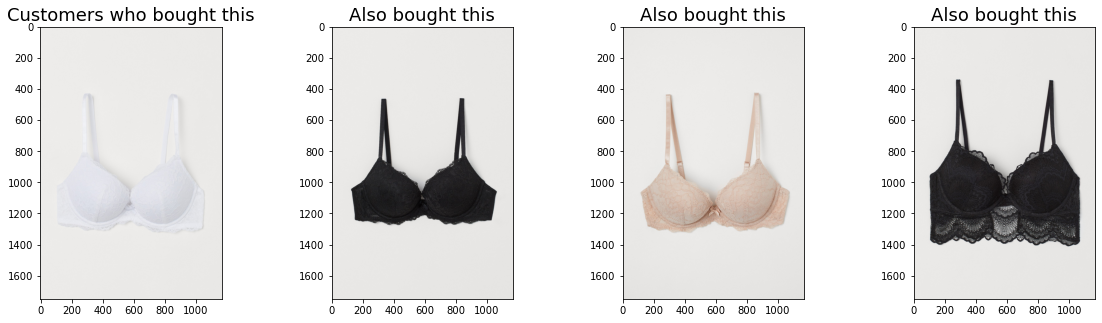

In [14]:
BASE = 'C:/Users/siyuf/Documents/H&M/'

for i,(k,v) in enumerate( pairs.items() ):
    name1 = BASE+'0'+str(k)[:2]+'/0'+str(k)+'.jpg'
    name2 = BASE+'0'+str(v[0])[:2]+'/0'+str(v[0])+'.jpg'
    name3 = BASE+'0'+str(v[1])[:2]+'/0'+str(v[1])+'.jpg'
    name4 = BASE+'0'+str(v[2])[:2]+'/0'+str(v[2])+'.jpg'
    if exists(name1) & exists(name2) & exists(name3) & exists(name4):
        plt.figure(figsize=(20,5))
        img1 = cv2.imread(name1)[:,:,::-1]
        img2 = cv2.imread(name2)[:,:,::-1]
        img3 = cv2.imread(name3)[:,:,::-1]
        img4 = cv2.imread(name4)[:,:,::-1]
        plt.subplot(1,4,1)
        plt.title('Customers who bought this',size=18)
        plt.imshow(img1)
        plt.subplot(1,4,2)
        plt.title('Also bought this',size=18)
        plt.imshow(img2)
        plt.subplot(1,4,3)
        plt.title('Also bought this',size=18)
        plt.imshow(img3)
        plt.subplot(1,4,4)
        plt.title('Also bought this',size=18)
        plt.imshow(img4)
        plt.show()
    #if i==63: break